In [14]:
# Synchrotron radiation 
import matplotlib.pyplot as plt
plt.style.use('huntstone')
import numpy as np
from scipy.constants import c, mu_0, epsilon_0, e, m_e
from scipy.special import fresnel, kv
import sys
sys.path.insert(0, "../")

import d2IMath as dm
from plotting import makefig

In [2]:
# Analytic solution 
def get_d2I(w, th, rho, gamma):
    f1      = (mu_0 * e**2 * c / (12 * np.pi**3)) * w**2 * (rho  / c)**2
    tht     = (1 / gamma**2) + th**2
    units   = f1 * tht**2
    xi      = (w * rho / (3 * c * gamma**3)) * (1 + th**2 * gamma**2)**(3/2)
    bessels = kv(2/3, xi)**2 + (th**2 / tht) * kv(1/3, xi)**2
    d2I     = units * bessels
    return d2I

In [3]:
# Define parameters
thxz  = np.linspace(-5, 5, 1000) * 1e-3 # rad, viewing angle
B     = 13 # Tesla
gamma = 1000
beta  = 1 - (1/gamma**2)
E     = gamma * (0.511e6) * 1e-9 # GeV
rho   = (10 / 2.998) * (beta * E / B)
w_c   = (3/2) * (c / rho) * gamma**3
w_n   = np.linspace(1e-3, 10, 1000)
w_arr = w_n * w_c

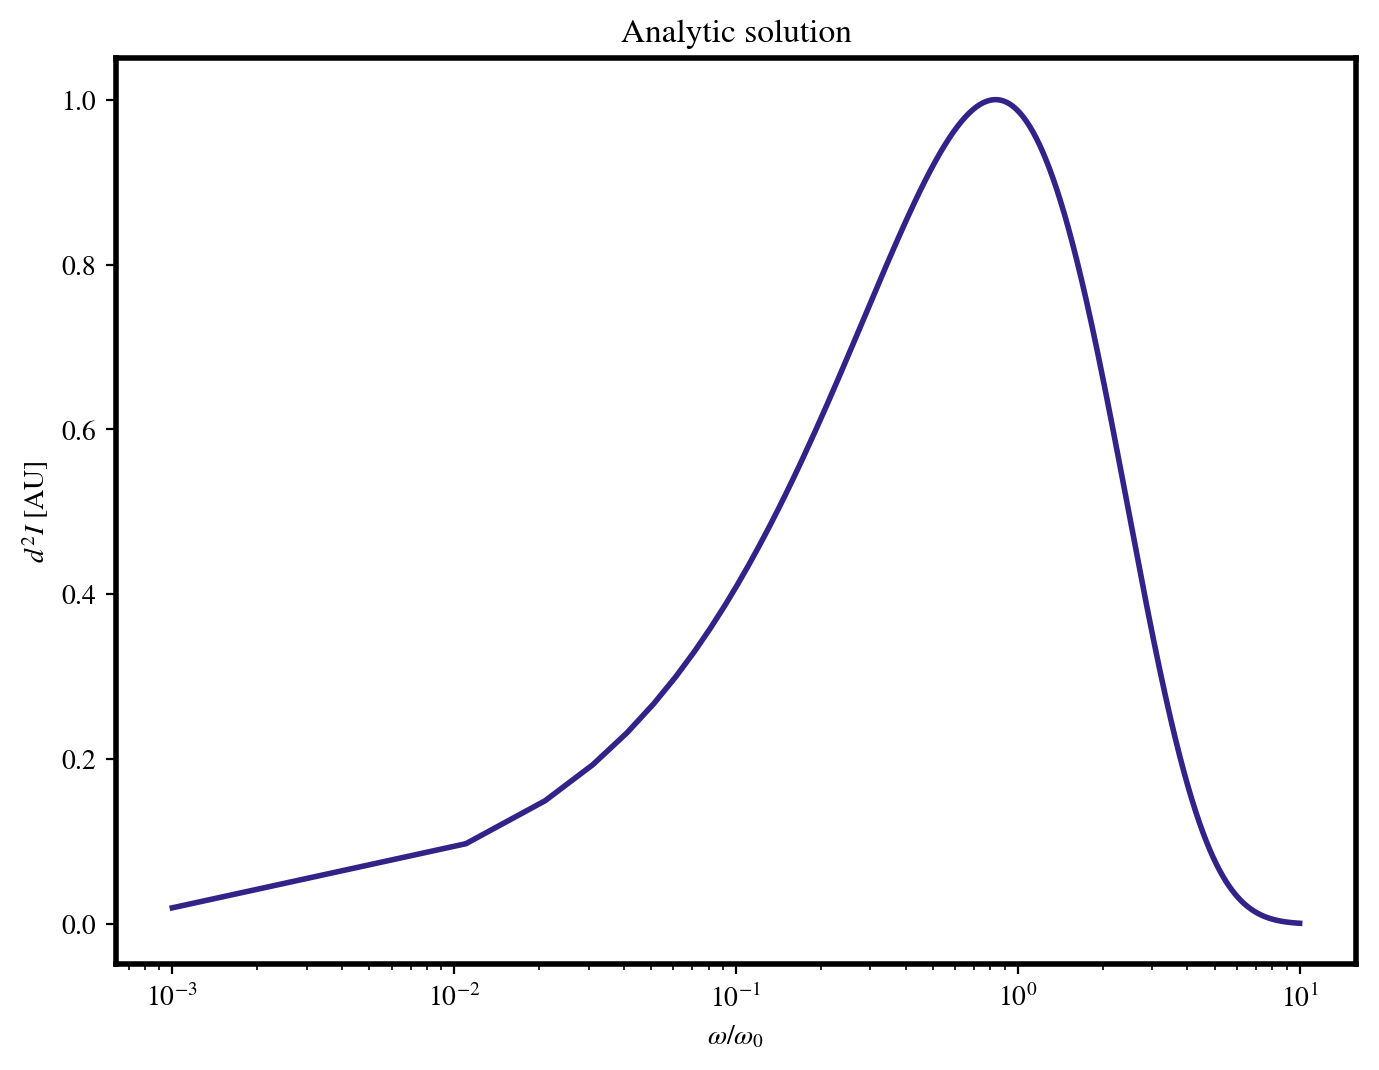

In [4]:
# On axis radiation
d2I_axis = get_d2I(w_arr, 0, rho, gamma)
fig, ax = makefig(xlab = r'$\omega / \omega_0$', ylab = r'$d^2I$ [AU]', titl = 'Analytic solution')
ax.plot(w_n, d2I_axis / max(d2I_axis))
ax.set_xscale('log')
plt.show()

In [7]:
# 2D observered radiation
d2I = np.zeros((len(w_arr), len(thxz)))
for i in range(len(thxz)):
    for j in range(len(w_arr)):
        d2I[i,j] = get_d2I(w_arr[i], thxz[j], rho, gamma)

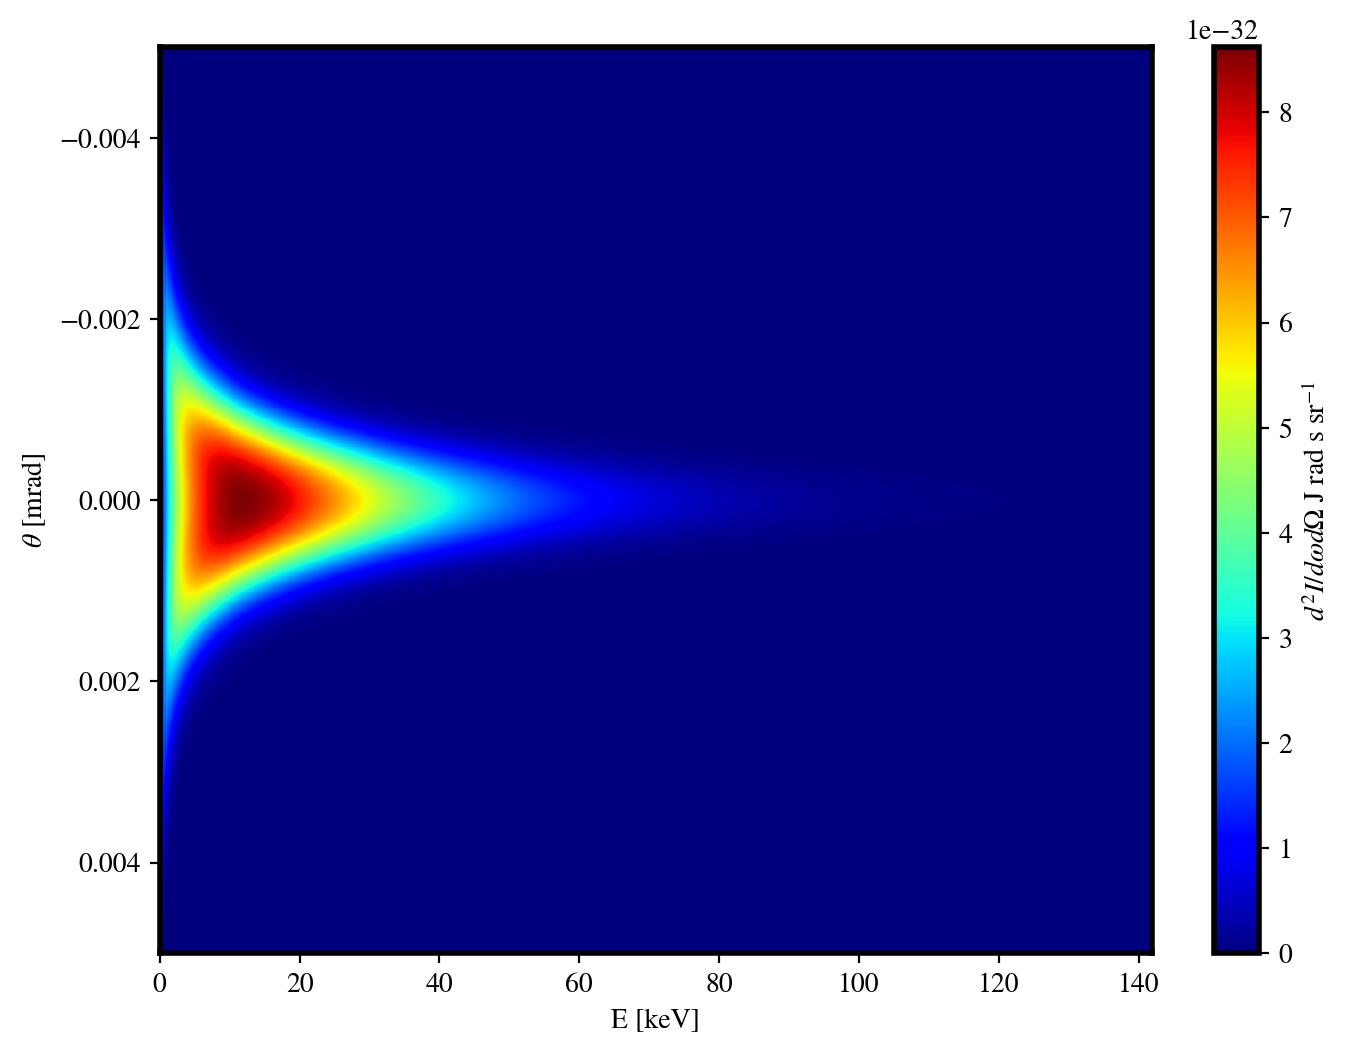

In [9]:
E = 4.136e-15 * w_arr * 1e-3
ext = [min(E), max(E), 5e-3, -5e-3]
fig, ax = makefig(xlab = 'E [keV]', ylab = r'$\theta$ [mrad]')
img = ax.imshow(np.transpose(d2I), extent = ext, aspect = 'auto', cmap = 'jet')
cbar = plt.colorbar(mappable = img)
cbar.set_label(r'$d^2I / d\omega d\Omega$ J rad s sr$^{-1}$')
plt.show()

In [12]:
# Thomas algorithm
bc    = beta * c
tf    = np.pi * rho / bc
tau_f = tf / gamma
dtau  = m_e * np.pi * 1e-4 / (e * B)
N     = int(tau_f / dtau)
t     = np.linspace(0, tf, N)
tau   = np.linspace(0, tau_f, N)
x     = rho * np.sin(bc * t / rho)
y     = rho * (1 - np.cos(bc * t / rho))
ct    = c * t
z     = np.zeros(len(t))
x4    = (ct, x, y, z)
# Interpolation
ct1 = np.zeros(len(tau)) + gamma * c
x1  = gamma * bc * np.cos(bc * t / rho)
y1  = gamma * bc * np.sin(bc * t / rho)
z1  = np.zeros(len(tau))

ct2 = np.zeros(len(tau))
x2  = -0.5 * (bc**2 / rho) * np.sin(bc * t / rho)
y2  = 0.5 * (bc**2 / rho) * np.cos(bc * t / rho)
z2  = np.zeros(len(tau))
x0n = (ct, x, y, z)
x1n = (ct1, x1, y1, z1)
x2n = (ct2, x2, y2, z2)
vx = x1n[1]
vy = x1n[2]
vz = x1n[3]
v  = (vx, vy, vz)
# Interpolation
vx1 = 2 * x2
vy1 = 2 * y2
vz1 = 2 * z2
v0n = (vx, vy, vz)
v1n = (vx1, vy1, vz1)

In [15]:
th    = np.array([0])
w     = w_arr[-1]
d2I   = dm.get_d2I(x0n, x1n, x2n, th, v0n, v1n, dtau, w_arr)

10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


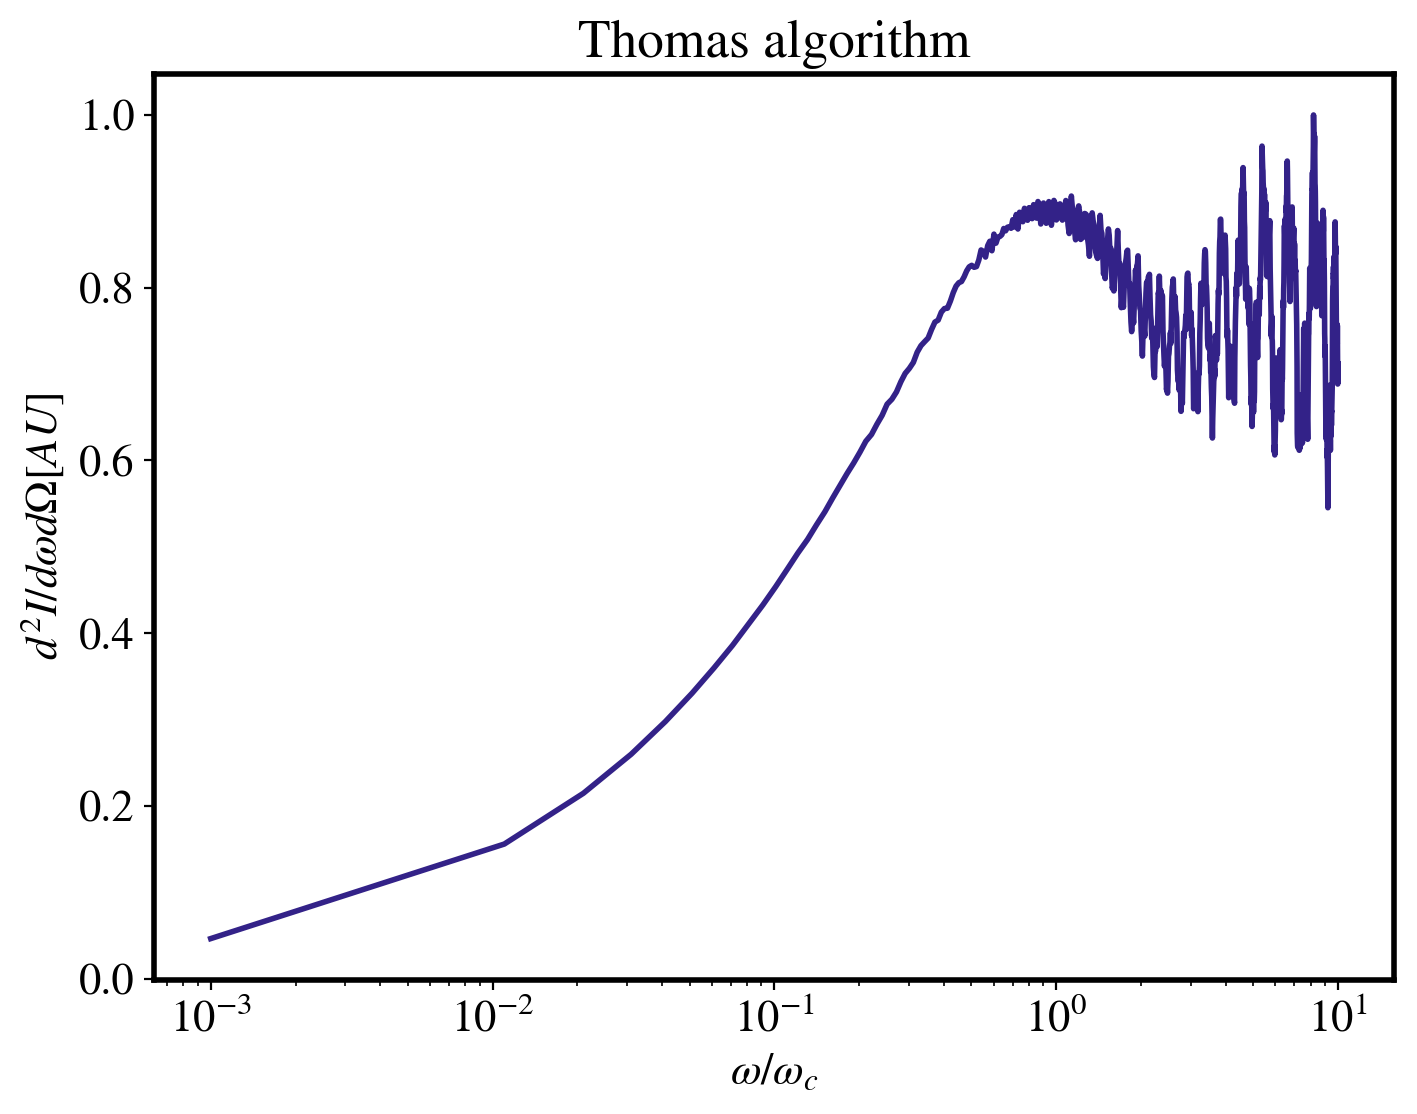

In [17]:
tstring = "Thomas algorithm"
fig, ax = makefig(xlab = r'$\omega / \omega_c$', ylab = r'$d^2I/d\omega d\Omega [AU]$', 
                 titl = tstring)
ax.plot(w_n, d2I / max(d2I))
ax.set_xscale('log')
plt.show()